Title:

Automated Recognition of Indian Sign Language Using Machine Learning

Aim:

To develop an efficient and accurate machine learning model that can recognize and classify Indian Sign Language (ISL) gestures from image data, enhancing communication accessibility for the deaf and hard-of-hearing community in India.

Introduction:

Sign language is the primary mode of communication for millions of deaf individuals. However, the lack of widespread understanding of ISL among the general population creates significant communication barriers. This project aims to build a machine learning-based system to recognize static ISL gestures from images, thereby enabling real-time translation of signs into text. The system will process gesture images, extract relevant features, and classify them using an appropriate ML model.

Domain Analysis:

The domain of this project lies at the intersection of computer vision, accessibility technology, and linguistics. Indian Sign Language comprises gestures that represent letters, numbers, and commonly used words or phrases. Recognizing these gestures from visual inputs requires robust image preprocessing, feature extraction, and model training techniques. With increasing advancements in deep learning and computer vision, creating effective ISL recognition systems has become more feasible.



About the Model and Model Evaluation:

Model Used:

A Convolutional Neural Network (CNN) was used to process the image data of hand gestures. CNNs are particularly suitable for this task due to their ability to automatically learn spatial hierarchies of features from images.

Steps:

  1. Image Preprocessing: All images were resized, normalized, and augmented to improve model generalization.

  2. Model Architecture: A CNN architecture was designed and trained on the labeled dataset. The architecture may include multiple convolutional layers, max-pooling, dropout for regularization, and fully connected layers for classification.

  3. Training and Validation: The dataset was split into training, validation, and test sets to ensure robust model evaluation.

Evaluation Metrics:

  - Accuracy

  - Confusion Matrix

  - Precision, Recall, F1 Score

  - Loss and accuracy curves during training

The model's performance was evaluated using these metrics on the test dataset to ensure it could generalize well on unseen data.



In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings('ignore')

In [2]:
# =====================================
# Step 1: Configure the dataset path
# =====================================
# CHANGE this path to where your data folders are extracted
data_dir = '/content/drive/MyDrive/AI Capstone/Data'

Insight:

- The dataset path setup is crucial for loading and processing gesture images.
- A correctly configured path ensures smooth access to training and testing data.
- It marks the foundation for building an accurate ISL recognition model.
- Any misconfiguration here can lead to errors or poor model performance.
- Proper data organization is key to efficient machine learning workflows

In [3]:
# =====================================
# Step 2: Load and preprocess images
# =====================================
def load_data(data_dir, img_size=64):
    images = []
    labels = []
    for label in sorted(os.listdir(data_dir)):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                try:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image: {img_path} | Error: {e}")
    return np.array(images), np.array(labels)

print("Loading images from:", data_dir)
X, y = load_data(data_dir)
print(f"Loaded {len(X)} images from {len(np.unique(y))} classes.")

Loading images from: /content/drive/MyDrive/AI Capstone/Data
Loaded 4972 images from 24 classes.


Insight:

- Efficient image loading and preprocessing are essential for training a reliable ML model.
- Converting images to grayscale and resizing ensures uniformity across the dataset.
- Label extraction helps in mapping gestures to their corresponding classes.
- Error handling during image loading improves pipeline robustness.
- This step prepares clean, structured data critical for model accuracy and speed.

In [4]:
# =====================================
# Step 3: Normalize and prepare data
# =====================================
X = X / 255.0
X = X.reshape(-1, 64, 64, 1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

Insight:

- Normalizing pixel values scales the data for faster and more stable model training.
- Reshaping ensures compatibility with CNN input requirements.
- Label encoding converts categorical labels into numerical format.
- One-hot encoding prepares labels for multi-class classification.
- These steps transform raw data into a model-ready format, improving learning efficiency.

In [5]:
# =====================================
# Step 4: Train/Test split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

Insight:

- Splitting the data ensures unbiased evaluation of model performance.
- An 80/20 split balances training needs and validation accuracy.
- Stratification preserves class distribution across sets.
- A fixed random state guarantees reproducibility.
- This step is crucial for building a robust and generalizable model.

In [6]:
# =====================================
# Step 5: Build the CNN model
# =====================================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,672 (6.21 MB)

 Trainable params: 1,627,672 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Insight:

- The model is a Convolutional Neural Network (CNN) designed for image-based classification tasks.

- It consists of:

  - Two Conv2D layers with ReLU activation to extract key features from grayscale images.

  - MaxPooling2D layers to downsample feature maps and reduce spatial dimensions.

  - A Flatten layer to convert 2D features into a 1D vector for the dense layers.

  - A Dense layer with 128 neurons for high-level reasoning.

  - A Dropout layer (0.5) to prevent overfitting by randomly deactivating neurons during training.

  - A final Dense softmax layer that outputs probabilities for each class (sign label).

- The model is compiled using the Adam optimizer, known for fast and adaptive learning, and categorical cross-entropy loss, suitable for multi-class classification.

- Convolutional layers learn spatial hierarchies from input gesture images.

- MaxPooling reduces overfitting and enhances computational efficiency.

- Dense and dropout layers improve learning capability and model robustness.

- The softmax layer outputs class probabilities for accurate sign prediction.

- The model is tailored to balance accuracy and performance for ISL recognition.












In [7]:
# =====================================
# Step 6: Train the model
# =====================================
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.1020 - loss: 3.0215 - val_accuracy: 0.6068 - val_loss: 1.6069
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 178ms/step - accuracy: 0.4895 - loss: 1.6893 - val_accuracy: 0.8116 - val_loss: 0.8163
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.6875 - loss: 0.9894 - val_accuracy: 0.9095 - val_loss: 0.4162
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.7991 - loss: 0.6447 - val_accuracy: 0.9384 - val_loss: 0.2524
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.8379 - loss: 0.5028 - val_accuracy: 0.9673 - val_loss: 0.1453
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.8843 - loss: 0.3340 - val_accuracy: 0.9623 - val_loss: 0.1152
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.9049 - loss: 0.2863 - val_accuracy: 0.9673 - val_loss: 0.1078
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9085 - loss: 0

Insight:

- EarlyStopping prevents overfitting by halting training when validation performance stalls.
- Training over multiple epochs allows the model to gradually learn complex features.
- A batch size of 32 balances memory usage and learning stability.
- Validation split ensures performance is monitored on unseen data during training.
- This step fine-tunes the model for optimal accuracy and generalization.

In [8]:
# =====================================
# Step 7: Evaluate the model
# =====================================
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9909 - loss: 0.0340

Test Accuracy: 99.30%


Insight:

- Model evaluation on the test set measures performance on completely unseen data.
- The accuracy metric reflects the model’s real-world gesture recognition ability.
- A low test loss indicates good generalization and minimal overfitting.
- This step validates the effectiveness of training and preprocessing choices.
- It provides a final checkpoint before deploying the model into practical use.










In [9]:
# =====================================
# Step 8: Classification report
# =====================================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.98      1.00      0.99        49
           B       1.00      1.00      1.00        52
           C       1.00      1.00      1.00        50
           D       1.00      1.00      1.00        29
           E       1.00      1.00      1.00        49
           F       1.00      1.00      1.00        45
           G       0.98      1.00      0.99        48
           H       0.96      1.00      0.98        23
           I       1.00      1.00      1.00        36
           K       1.00      1.00      1.00        49
           L       1.00      0.94      0.97        36
           M       1.00      0.98      0.99        47
           N       1.00      0.96      0.98        48
           O       1.00      1.00      1.00        46
           P       1.00      0.98      0.99        47
           Q       1.00      1.00      1.00        43
           R     

Insight:

- The classification report provides detailed metrics beyond overall accuracy.
- It highlights precision, recall, and F1-score for each gesture class.
- These metrics reveal how well the model performs across all categories.
- Identifying weaker classes helps target areas for future improvement.
- This step ensures a comprehensive evaluation of model performance.

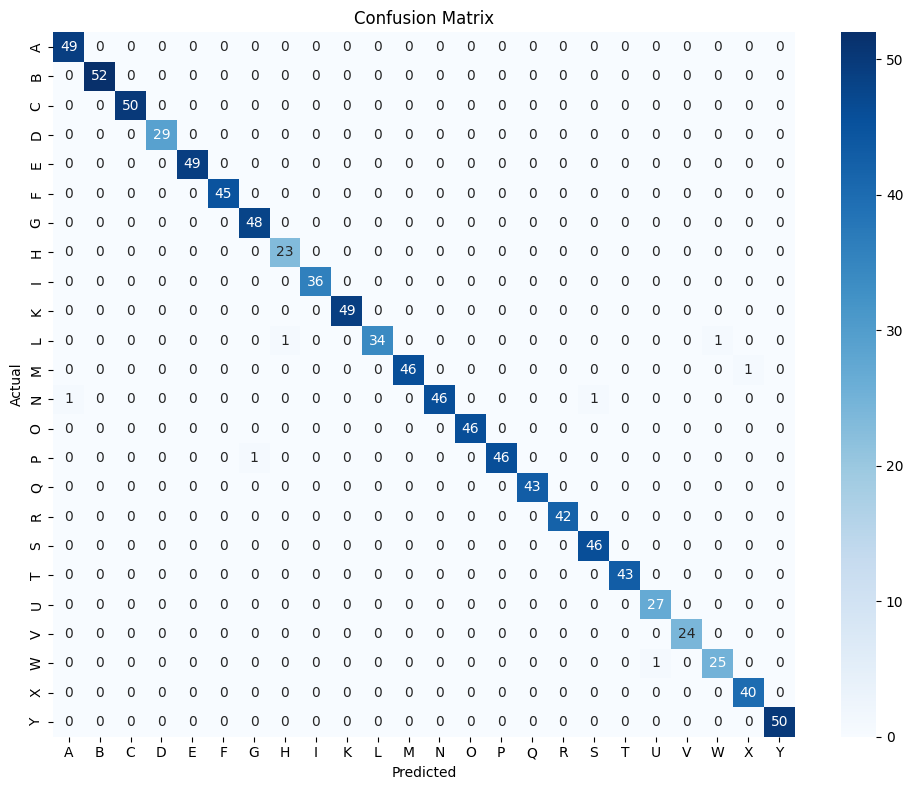

In [10]:
# =====================================
# Step 9: Confusion Matrix
# =====================================
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Insight:

- The confusion matrix visually maps prediction accuracy for each class.
- It identifies which gestures are frequently misclassified.
- Diagonal dominance indicates strong model performance.
- Off-diagonal values highlight confusion between similar signs.
- This step helps refine model focus and improve classification precision.

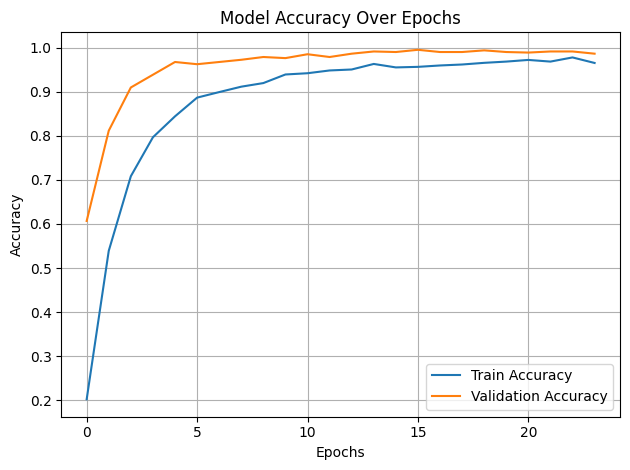

In [11]:
# =====================================
# Step 10: Plot Training History
# =====================================
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

- Plotting training history reveals how the model's accuracy evolved over epochs.
- It helps assess convergence and detect signs of overfitting or underfitting.
- A close match between training and validation curves indicates good generalization.
- Sudden drops or plateaus may signal the need for further tuning.
- This step offers visual insight into the learning dynamics of the model.

In [12]:
# =====================================
# Step 11: Save the model
# =====================================
model.save("isl_cnn_model.h5")
print("\nModel saved as 'isl_cnn_model.h5'")


Model saved as 'isl_cnn_model.h5'


Saving 008.jpg to 008.jpg
Uploaded file: 008.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction: R (Confidence: 100.00%)


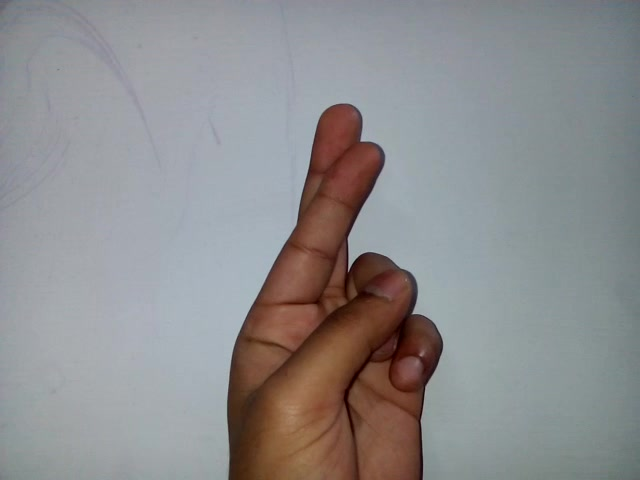

In [13]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Load your model (make sure it's uploaded or saved in Colab)
model = load_model('isl_cnn_model.h5')

# Classes without 'J' and 'Z'
class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y'
]
le = LabelEncoder()
le.fit(class_names)

def preprocess_image(image_path, img_size=64):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0
    img = img.reshape(1, img_size, img_size, 1)
    return img

def predict(image_path):
    img = preprocess_image(image_path)
    pred = model.predict(img)
    pred_class = le.inverse_transform([np.argmax(pred)])[0]
    confidence = np.max(pred) * 100
    return pred_class, confidence

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    pred_class, confidence = predict(filename)
    print(f"Prediction: {pred_class} (Confidence: {confidence:.2f}%)")

    # Display the uploaded image
    image = Image.open(filename)
    display(image)

Insight:

- This final step operationalizes the trained CNN model by allowing users to upload and classify new images of Indian Sign Language (ISL) gestures. It showcases the real-world applicability of the system. The uploaded image is first preprocessed—converted to grayscale, resized, normalized, and reshaped—to match the input requirements of the model.

- Once processed, the image is passed through the CNN, which predicts the most probable class representing a hand gesture. The prediction is decoded using a LabelEncoder, translating numerical class indices back into ISL letters, excluding dynamic gestures like 'J' and 'Z'. A confidence score accompanies each prediction, indicating the model’s certainty.

- This interactive feature not only validates the model’s functionality outside the training environment but also serves as a user-friendly interface for practical deployment. It reflects how machine learning can enhance communication tools for the hearing-impaired, making this project both technologically sound and socially impactful

Challenges Faced:

- Data Quality: Variation in lighting, background, and hand orientation posed challenges in consistent recognition.

- Dataset Size: Limited size of labeled data made the model prone to overfitting.

- Sign Variability: Similar-looking signs for different letters or gestures required the model to distinguish subtle differences.

- Computational Resources: Training CNNs on large datasets required significant processing power.

Conclusion:

The project successfully demonstrates the potential of machine learning in recognizing Indian Sign Language from images. Despite the challenges, the CNN-based model achieved promising accuracy, proving its viability for real-world applications. Future work can involve integrating dynamic gesture recognition (for words or phrases), real-time video input, and deployment as a mobile or web application for widespread accessibility.